# Python for MAxxx: 

Why you should pick up Python to help with your MA100, MA107, MA212, MA207 and beyond

3 Short Vignettes

+ Calculus
+ Linear Algebra

**Requisites**: It would help if you were familiar with Python syntax

**Target Audience**: Department of Maths, Statistics, Econ, Finance, Management students who take any of MA100, MA107, MA212, MA207.  <br/> But also anyone interested in Python for Data Science!

### 1.2 Using Python as a calculator: 

Define functions, and compositions of functions, using standard operations (+ - * / ), trigonometric functions (sin, cos) and more standard functions


*1.2.1 Python for functions*

We can define $ f(x) = sin(x) + x^2 - x + 3$ in Python as such

1.2.1.1 is the format: $f(x) = sin(x) + x^2 - x + 3$

<!-- 1.2.1.2 is the format: $f:\mathbb{R} \rightarrow \mathbb{R} ;  x  \rightarrow sin(x) + x^2 - x + 3$ in the lambda notation -->



In [ ]:
import numpy as np

#1.2.1.1
def f(x):
  '''
  A standard function definition
  A function takes in inputs and returns an output
  Inputs: x
  Outputs: sin(x) + x^2 + 3 - x
  '''
  return np.sin(x) + (x - 2) ** 2 + 3 - x

# #1.2.1.2
# #The same definition using a lambda; used for short functionns
# f_2 = lambda x: np.sin(x) + (x - 2) ** 2 + 3 - x

print(f(3.0))

1.1411200080598674


*1.2.2 Vectorisation*

We can apply a function over an *array* of values as opposed to just one. 

*Note :  this requires using the numpy version of standard functions, np.sin, np.cos etc.

In [ ]:
f(np.array([1.0, 2.0, 3.0]))

array([3.84147098, 1.90929743, 1.14112001])

## 1.3 Plots

You can use Python for plotting.

Why is the vectorisation concept useful? 

It relates to the idea of computer representation; A computer can only represent a finite range of values. 

In many contexts, a good enough discrete approximation is sufficient. For example, the plotted curve below looks quite smooth, for values of x on the interval with values 0.01 

*1.3.1 - Plot of our function, f*

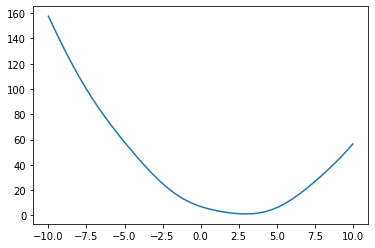

In [ ]:
import matplotlib.pyplot as plt #matplotlib for plots

#1.3.1 - Plot of x, f(x)
x = np.linspace(-10, 10, 50) #generate 50 values from -10 to 10, i.e. [-10, -9.6, -9.2...9.6, 10]
plt.plot(x, f(x))

Matplotlib has a lot of mileage; you can do some more complex plots such as a 3D plot. You can also look tweak the plotting parameters to change the aesthetics, or look into other plotting libraries such as seaborn or plotly

*1.3.2 - Plot of a multivariate function : $z = f(x, y) = 5 - x^2 - y^2$*

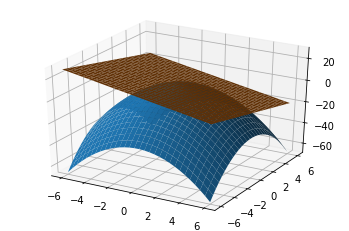

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

def f2(X, Y):
  return 5 - (X ** 2 + Y ** 2 )


Z = f2(X, Y)

ax.plot_surface(X, Y, Z);
ax.plot_surface(X, Y, -2 * (X - 1) - 2 * (Y - 1));

### 1.3 Symbolic computation - Derivatives, Integrals

In [ ]:
from sympy import *
x, y, z = symbols('x y z')
print("1st derivative:", diff(sin(x) + (x - 2) ** 2 + 3 - x, x))
print("2nd derivative:", diff(diff(sin(x) + (x - 2) ** 2 + 3 - x, x)))

1st derivative: 2*x + cos(x) - 5
2nd derivative: -sin(x) + 2


### 1.4 Example: Optimisation

Let's say this function is some sort of cost function. We want to choose the point that minimises costs

We know that the derivative is : $ 2x + cos(x) - 5$ 

If we want to find a value for the , it would be quite diffiult to get an exact value for the minima given the inclusion of the cos(x) term

We can do this computationally using gradient descent:

The procedure:

Let $x_{t + 1} = x_{t} - \eta f'(x_{t})$

And this should converge to a local minima

In [ ]:
def dfdx(x):
  return 2 * x + np.cos(x) - 5

In [ ]:
start = -10
points = [(start, f(start))]

epochs = 10
learning_rate = 0.8

for i in range(epochs):
  points += [(start, f(start))]
  start -= learning_rate * dfdx(start)

x = np.linspace(-10, 10, 50) #generate 50 values from -10 to 10, i.e. [-10, -9.6, -9.2...9.6,10]
plt.plot(x, f(x))
plt.plot(np.array(points)[:, 0], np.array(points)[:, 1])

NameError: ignored

### Gradients

We can use JAX to do automatic differentation (AutoDiff). 

Instead of explicitly computing the derivative of this function, JAX can compute the value of a derivative

Why is this useful? For a more complex function, explicitly computing the derivative could be difficult

The calculation of gradients is key for several optimisation techniques, such as backpropogation for neural networks

In [ ]:
grad_f = grad(f)
print(grad_f(3.0))

4.0100074


### 2.1

We can use Python to perform Linear Algebra computations: Matrix addition, multiplication, inverses eigenvalues


The following is akin to the matrix

$$ A = \begin{pmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1& 1 & 1  \end{pmatrix},  $$

In [ ]:
A = np.array([[1, 1, 1],
             [1, 1, 1],
             [1, 1, 1]])

B = np.array([[1, 1, -1],
             [-1, 1, 1],
             [-1, -1, 1]])

x = np.array([1, 2, 3])

In [ ]:
matrix_vector_product = A @ x
print(f"The Matrix-Vector product (Ax) is: \n{matrix_vector_product}")
matrix_sum = A + B
print(f"The Matrix-Matrix sum A + B is: \n{matrix_sum}")

The Matrix-Vector product (Ax) is: 
[6 6 6]
The Matrix-Matrix sum A + B is: 
[[2 2 0]
 [0 2 2]
 [0 0 2]]


Caveat: Numerical stability. Computer representations of decmials are not precise

Calculate eigenvalues:

In [ ]:
np.linalg.eig(A)

(DeviceArray([ 3.0000002e+00+0.j, -2.2114128e-11+0.j,  2.2114128e-11+0.j],            dtype=complex64),
 DeviceArray([[ 5.7735026e-01+0.j, -2.6228541e-04+0.j, -2.6240689e-04+0.j],
              [ 5.7735026e-01+0.j,  7.0723796e-01+0.j, -7.0697558e-01+0.j],
              [ 5.7735026e-01+0.j, -7.0697558e-01+0.j,  7.0723790e-01+0.j]],            dtype=complex64))

Example : Production Matrix


Example : Markov Chains


In [ ]:
A = np.array([[0.9, 0.8],
              [0.1, 0.2]])

In [ ]:
v = np.array([10,20])

In [ ]:
print("Eigenvalues:",np.linalg.eig(A)[0])
print("Eigenvectors:\n", np.linalg.eig(A)[1])

Eigenvalues: [1.  0.1]
Eigenvectors:
 [[ 0.99227788 -0.70710678]
 [ 0.12403473  0.70710678]]


In [ ]:
A @ v

DeviceArray([25.,  5.], dtype=float32)

3.1 Putting together Linear algebra and Calculus: 


Stochastic Gradient Descent

Conceptually: The same gradient descent, but applied to matrices

Actual function: $ y = 2x_{1} + 3 x_{2} + \epsilon, \epsilon \sim N(0,1) $

In [ ]:
X = np.random.randint(0,10, (100, 2))
b_1, b_2 = -7, -2
y = b_1 * X[:,0] + b_2 * X[:,1] + np.random.randn(100)
weights = np.random.randn(2)
weights_path = [weights.copy()]
print(weights)

[ 0.0653018  -0.38422126]


Defined the loss function: Minimise the mean squared error ('distance') between our estimated function and the actual

$ L(y, x, w) = \frac{1}{N} \sum (y_{i} - w_{1} x_{i1} - w_{2} x_{i2})^2 $

In [ ]:
learning_rate = 0.005
ITERS = 100
losses = []
for i in range(ITERS):
  weights[0] -= learning_rate * np.sum(-2 * X[:,0] * (y - X @ weights)) / 100
  weights[1] -= learning_rate * np.sum(-2 * X[:,1] * (y - X @ weights)) / 100
  weights_path += [weights.copy()]
  losses += [np.mean((y - X @ weights) ** 2)]

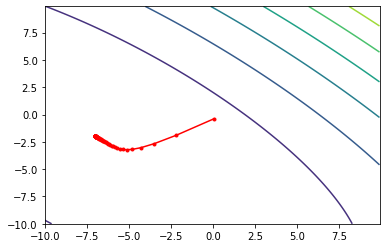

In [ ]:
w1 = np.arange(-10,10,0.1)
w2 = np.arange(-10,10,0.1)
W1, W2 = np.meshgrid(w1, w2)
plt.contour(w1, w2, np.mean((np.tensordot(X,np.array([W1,W2]),axes=1) - y.reshape(-1,1,1)) ** 2,axis=0))

weights_path = np.array(weights_path).reshape(-1,2)
plt.plot(weights_path[:,0], weights_path[:,1], ".r-")

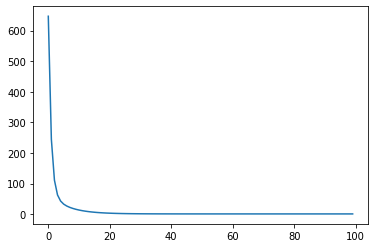

In [ ]:
plt.plot(np.arange(ITERS),losses)

#Further Resources

Scipy Lectures: https://scipy-lectures.org/

Tutorials for how to use Python (numpy, scipy) for numerical computation
